 ***
<a id='lesson-4'></a>
# Lesson-4: Molecular Dynamics
***
- Molecular Dynamics is essentially the application of the Newtons Second Law to molecules, where the force acting on each part of the molecule is computed by modelling its interaction with every other part of the system.
- Total potential energy of the system: 
$$ U = \sum_{i\in\{bonds\}} \frac{1}{2} k_{b,i} (d_i - d_{0,i})^2 + \sum_{i\in\{angles\}} \frac{1}{2} k_{a,i} (\theta_i - \theta_{0,i})^2 + \\ \sum_{i\in\{dihedrals\}} \phi ( cos(n\theta_i)-1)  +  \sum_{i,j\in\{non-bond~pairs\}} \left( U_{LJ}(i,j) +  U_{Columbic}(i,j)\right)
$$
- Equations of motion given by:
$$ \frac{d\vec{p}_i}{dt} = \vec{F}_i \\ \frac{d \vec{r}_i}{dt} = \vec{p}_i/m_i $$
- Euler Method:
$$ \vec{p}_i(t+dt) = \vec{p}_i(t) + dt~\vec{F}_i(t) \\ \vec{r}_i(t+dt)=\vec{r}_i(t) + dt\vec{p}_i/m_i
$$
where the atom index $i \in [1,N]$
- Check on accuracy: constant total energy, total linear momentum
- Example: Simple harmonic oscillator

## Example: Argon
Argon atom is electrically neutral and a good model for the pair-wise interaction between two Argon atoms is given by Lennard-Jones potential, whose functional form is given by:
$$ U_{LJ} (\vec{r}_i,\vec{r}_j) = 4 \epsilon \left( \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^6 \right)  $$
where $\vec{r} = \vec{r}_i - \vec{r}_j$ and $r=|\vec{r}|$. The force on particle $i$ due to its interaction via LJ potenital with particle $j$ is then given by: $$-\left( \frac{\partial U_{LJ}}{\partial x_i}, \frac{\partial U_{LJ}}{\partial y_i},\frac{\partial U_{LJ}}{\partial z_i} \right)$$
And the total potential of the system of $N$ Argon atoms is sum of all the pairwise interactions, i.e.,
$$ U = \frac{1}{2} \sum_{i,j=1, i\ne j}^N U_{LJ} (\vec{r}_i,\vec{r}_j) $$
Using the Euler method mentioned above, write a program to compute the trajectory of the system! 

Following functions might need to be written:

- `initialise_config`
- `initialise_momenta`
- `compute_force`, `compute_pairwiseLJ(i, j, sigma, epsilon)`
- `compute_totalEnergy`, `compute_energy_pairwiseLJ(i, j, sigma, epsilon)`
- `euler_integrate(timestep)`



In [320]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits import mplot3d
import math

## Initializing Position and Momenta of System to Simulate
***

[[[ 5.15285845e-01  9.07688069e-01  3.58101721e-01  2.64586517e-01
    6.33641872e-01  8.82454347e-01  1.10001713e+00  1.18489975e+00
    1.65181688e+00  1.80821601e+00  1.31206491e+00  6.43352344e-01
    6.24740281e-01  1.19339008e+00  2.10231505e+00  1.14567693e+00
    6.31438749e-01  4.18008785e-01  3.21089713e-01  6.24085945e-01
    4.12910167e-01  1.07575282e+00  1.38914597e+00  1.21452879e+00
    1.78952189e+00  1.27175057e+00  1.55222905e+00  1.63521722e+00
    7.30905901e-01  1.11676275e+00]
  [ 5.43233056e-01  5.16615718e-01  1.54186453e+00  8.76201666e-01
    6.69027790e-01  1.54705688e+00  7.40876872e-01  1.47626426e+00
    1.09875220e+00  5.55146303e-01  3.24785152e-01  7.64235667e-01
    2.30250366e-01  1.24101750e+00  9.66152671e-01  8.74648979e-01
    1.18680495e+00  6.79954406e-01  1.40656472e+00  1.58230912e+00
    1.66124234e+00  3.47992962e-01  1.51771044e+00  1.39178680e+00
    5.39481115e-01  4.68769078e-01  9.98225583e-01  1.06537787e+00
    1.34205553e+00  1.0802

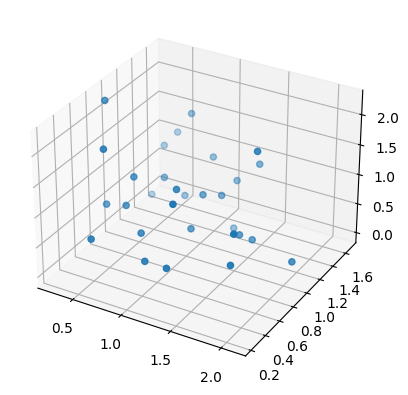

In [321]:
def initialize_momenta(n):
    Centered=np.ones((3, n))
    Noise=np.random.normal(scale=0.5, size=(3,n))
    V_p=np.add(Centered, Noise)*1e-22
    return V_p 

def initialize_positions(n):
    Centered=np.ones((3, n))
    Noise=np.random.normal(scale=0.5, size=(3,n))
    V_r=np.add(Centered, Noise)
    return V_r

def initialize_config(size):
    V_p=initialize_momenta(size)
    V_r=initialize_positions(size)
    # print(np.ndim(V_p))
    # print(np.ndim(V_r))
    StateArray=np.stack((V_r, V_p), axis=0)

    return StateArray

config=initialize_config(30)
print(config)
# print(np.shape(config))

ax = plt.axes(projection ="3d")
ax.scatter3D(config[0][0], config[0][1], config[0][2])
plt.show()



Here we have initialized a 3 Dimensional array to store the configuration of the system of shape $(2, 3, n)$. The first index represents the position and momentum configuration of the system respectively. The second index represents the position or momentum along the x, y and z axis repspectively. n here represents the number of atoms we are simulating so we have a 1D list basically telling us the index of the particle. The elements of the array are chosen by centering around 1 and choosing gaussian samples centered around 0 to add noise. 

## Finding Potential Energy of the System
***

In [322]:

def IntraMolecularEnergy(configuration):
    Energy=0
    Energy+=CovalentBondEnergy(configuration)
    Energy+=BondAngleEnergy(configuration)
    Energy+=TorsionEnergy(configuration)
    return Energy

def CovalentBondEnergy(configuration):
    return 0

def BondAngleEnergy(configuration):
    return 0

def TorsionEnergy(configuration):
    return 0   



In [332]:

def InterMolecularEnergy(configuration, sigma, epsilon):
    sigma=1e-9
    Energy=0
    Energy+=np.sum(LeonardJonesEnergy(configuration, sigma, epsilon))
    Energy+=ElectroStaticEnergy(configuration, epsilon)   
    return Energy

def LeonardJonesEnergy(config, sigma, epsilon):
    config_shape=np.shape(config)
    LJenergies=[]
    for particle in range(config_shape[2]):
        energy=0
        for interaction in range(particle+1,config_shape[2]):
            r=0
            for dimension in range(config_shape[1]):
                r+=(config[0][dimension][particle]-config[0][dimension][interaction])**2

            print(r)
            energy+=4*epsilon*(((sigma**12)/(r**6)) - ((sigma**6)/(r**3)))
            print(energy)
            LJenergies.append(energy)

    return LJenergies

def ElectroStaticEnergy(config, epsilon):
    return 0


In [333]:

def PotentialEnergy(config, sigma, epsilon):
    Energy=0
    Energy+=IntraMolecularEnergy(config)
    Energy+=InterMolecularEnergy(config, sigma, epsilon)
    return Energy

Here we have written a basic potential energy function. However, since the system we are simulating is Argon, we do not have to account for the Bond Energy, the Bond Angle term and the torsion terms which arise in molecular dynamic systems. The Electrostatic energy term is also not considered, so all these functions will return 0 in the calculation of the potential energy   

In [334]:
U=PotentialEnergy(config, 1e-9, 1e-23)
U

1.5198347848110516
-1.1393859271454357e-77
2.0264631818720042
-1.6200524088335493e-77
0.3020478212286112
-1.4677534289776942e-75
1.0360302536274633
-1.5037236145525946e-75
2.0909240613434705
-1.508099291092205e-75
0.7303221280378921
-1.6107865621995398e-75
2.6839762179344975
-1.6128553883698357e-75
1.6068153789953097
-1.6224972756957738e-75
2.2823562946302776
-1.6258616914997491e-75
2.468984841177577
-1.6285193839384962e-75
0.4504748638601138
-2.0660901540033221e-75
1.3038152363389928
-2.0841374372985185e-75
2.3228619534105674
-2.0873289001187861e-75
5.111631767297984
-2.0876283894181724e-75
2.38661347292717
-2.0905708708258462e-75
1.5756324128433263
-2.1007966232216793e-75
1.228795621406159
-2.1223552466118687e-75
3.8162234327984024
-2.1230749583893164e-75
1.233851521917941
-2.1443696467135435e-75
2.0096915736502656
-2.1492976587123868e-75
2.220887166771438
-2.1529492360879582e-75
2.4124641560047655
-2.1557981372552418e-75
4.789935952333405
-2.1561621116832547e-75
3.281120594020689
-2

-2.8657910843517593e-71

## Computing Force on Each Particle
***


In [326]:
def LJForce(config, epsilon, sigma):
    config_shape=np.shape(config)
    Forces=[]
    for particle in range(config_shape[2]):
        for interaction in range(config_shape[2]):
            if interaction != particle:
                F={0:0, 1:0,2:0}
                r=0
                for dimension in range(config_shape[1]):
                    r+=(config[0][dimension][particle]-config[0][dimension][interaction])**2
            
                coeff=48*epsilon*(2*(sigma**12)/(r**7)-(sigma**6)/(r**4))
                F[0]-=coeff*config[0][0][particle]
                F[1]-=coeff*config[0][1][particle]
                F[2]-=coeff*config[0][2][particle]
            
        Forces.append(F)

    return Forces

LJForce(config, 1e-23, 1e-9)

[{0: 2.915156291587462e-77,
  1: 3.0732636561736167e-77,
  2: 1.0618709471081771e-76},
 {0: 2.0647460307995043e-74,
  1: 1.1751616993348916e-74,
  2: 1.6118251020721056e-74},
 {0: 4.4283624057433163e-76,
  1: 1.906702632752773e-75,
  2: 1.0817099582591211e-75},
 {0: 2.4285629742487165e-78,
  1: 8.042401225533735e-78,
  2: 2.051629471465035e-77},
 {0: 1.1517226882967585e-74,
  1: 1.2160409818668308e-74,
  2: 1.5883839105677645e-74},
 {0: 7.328252434820948e-74,
  1: 1.2847376633443558e-73,
  2: 7.499617873654198e-74},
 {0: 6.001165102471019e-74,
  1: 4.0418683450651156e-74,
  2: 7.01534199075669e-74},
 {0: 5.275186105604215e-73,
  1: 6.572343970451229e-73,
  2: 3.154790057580109e-73},
 {0: 4.0373308114334054e-76,
  1: 2.6855435274072127e-76,
  2: 4.3904294855050715e-76},
 {0: 1.971098436072845e-75,
  1: 6.051533702928689e-76,
  2: 1.1942894864434072e-75},
 {0: 2.5617709648338333e-75,
  1: 6.341341530597256e-76,
  2: 1.0551307702416235e-75},
 {0: 5.365509703673273e-75,
  1: 6.373667442891

Here we return a list of dictionaries where each dictionary stores the force in the respective direction on the $i^{th}$ particle where $i$ is the index of the particle in the list.


## Performing Euler Integration for the System
***

(2, 3, 30)


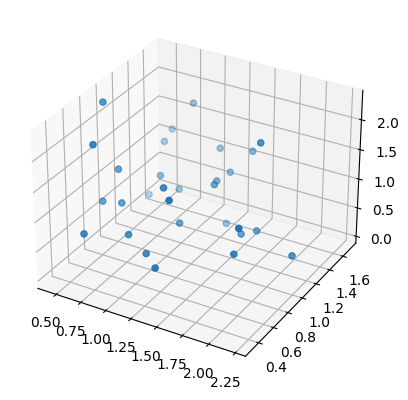

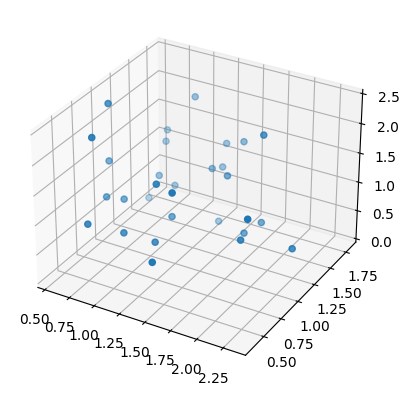

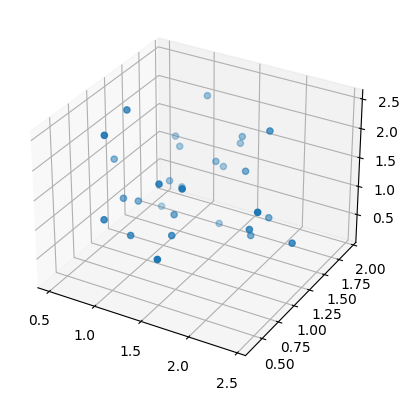

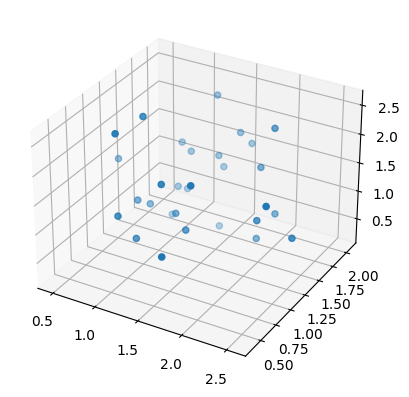

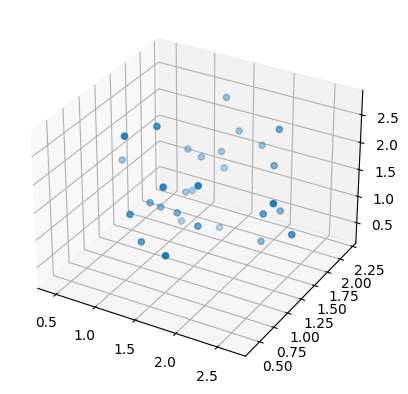

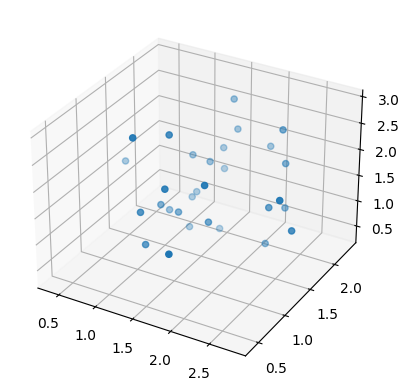

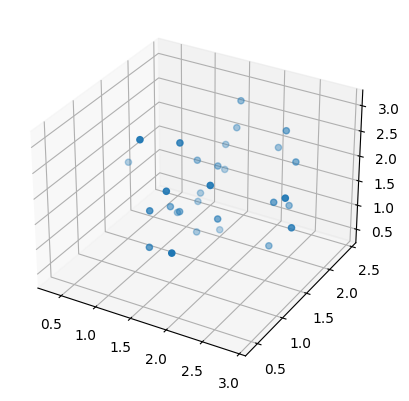

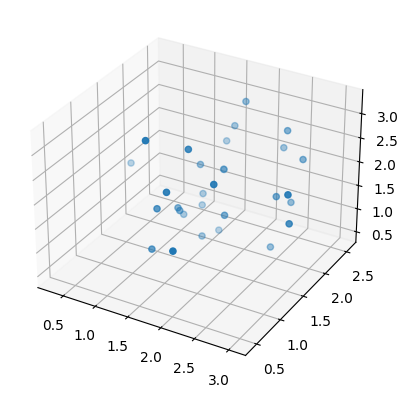

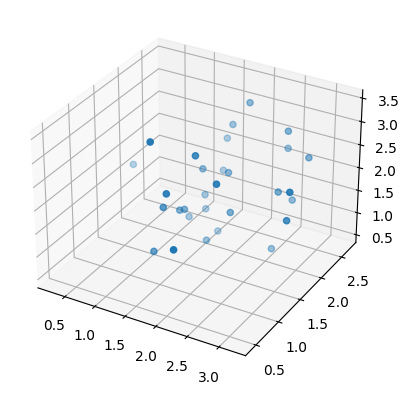

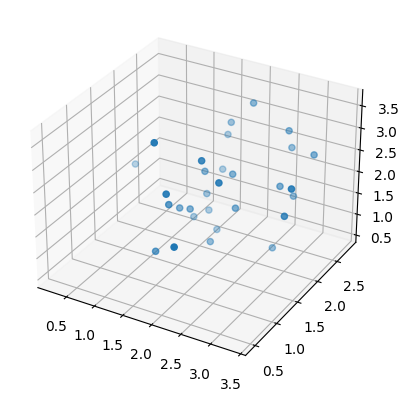

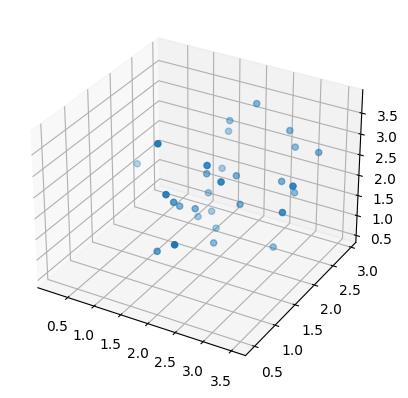

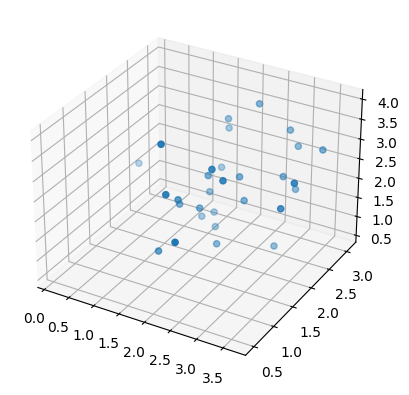

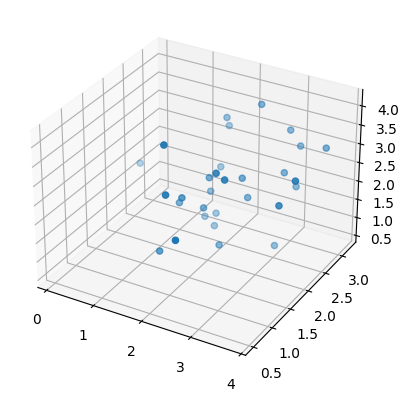

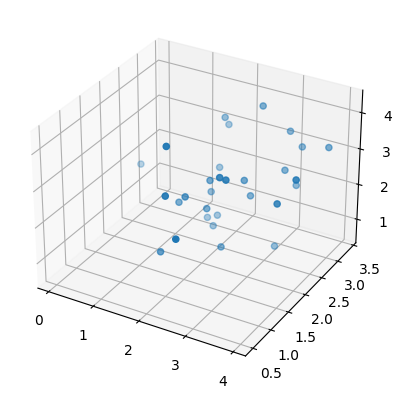

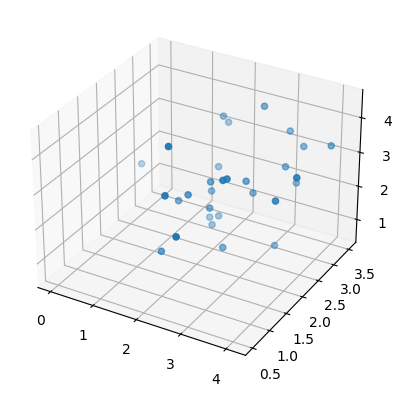

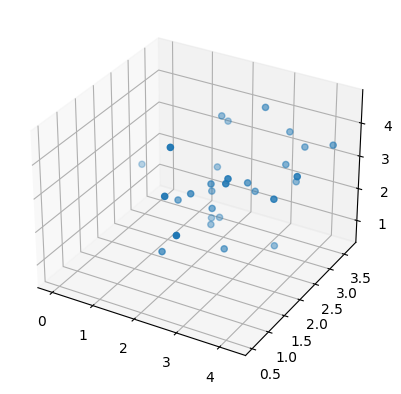

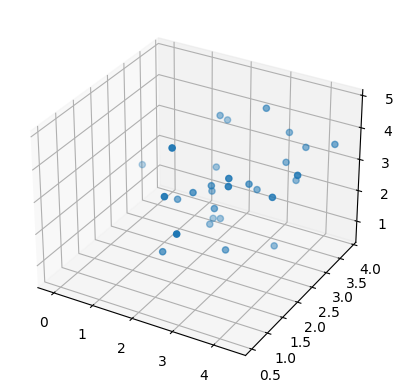

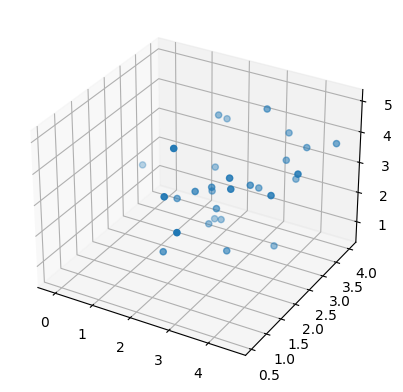

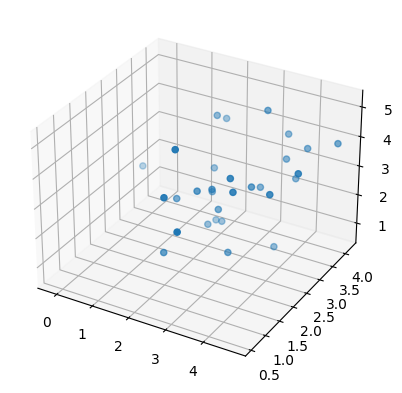

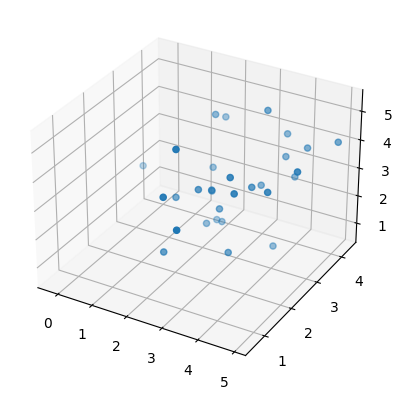

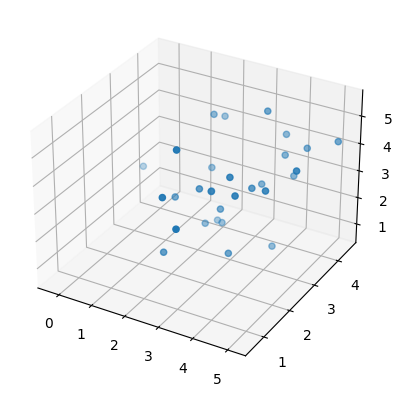

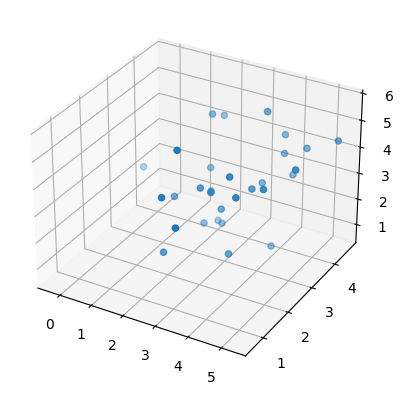

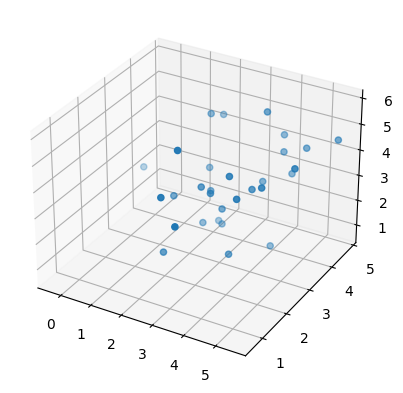

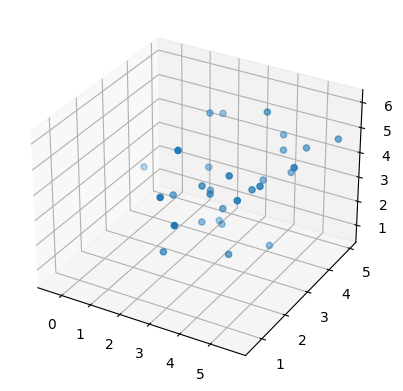

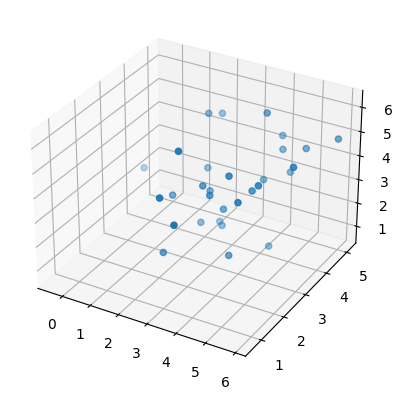

In [327]:
def EulerIntegrate(timestep, initial_config, mass, iterations):
    system=np.copy(initial_config)
    shape=np.shape(initial_config)
    print(shape)

    for t in range(iterations):
        Forces=LJForce(system, 1e-23, 1e-9)
        # print(Forces)

        for particle in range(shape[2]):
            for dimension in range(shape[1]):
                system[0][dimension][particle]+=system[1][dimension][particle]*timestep/mass
                system[1][dimension][particle]+=Forces[particle][dimension]*timestep
                
                # print(Forces[particle][dimension]*timestep)
                # print(system[1][dimension][particle])

                # print(system[1])
                # print(system[1])

                # print(system[1][dimension][particle])
        
            
        # print(system[0]-initial_config[0])
        # print(system[1]-initial_config[1])

        ax = plt.axes(projection ="3d")
        ax.scatter3D(system[0][0], system[0][1], system[0][2])
        plt.show()


EulerIntegrate(1e-5, config, 1e-26, 25)
            

# Required Plots
***

## Momentum vs Time Graph

1) Momentum of System

(2, 3, 30)


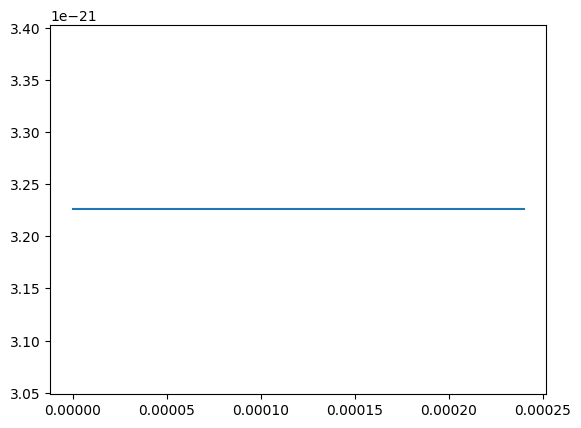

In [328]:
def MomentumTime(timestep, initial_config, mass, iterations):
    system=np.copy(initial_config)
    shape=np.shape(initial_config)
    print(shape)
    momenta_values=[]
    time_values=[]

    for t in range(iterations):
        time_values.append(timestep*t)

        Forces=LJForce(system, 1e-23, 1e-9)
        for particle in range(shape[2]):
            for dimension in range(shape[1]):
                system[0][dimension][particle]+=system[1][dimension][particle]*timestep/mass
                system[1][dimension][particle]+=Forces[particle][dimension]*timestep

        momenta_values.append(math.sqrt(np.sum(system[1][dimension][:])**2))

    plt.plot(time_values, momenta_values)
    plt.show()

MomentumTime(1e-5, config, 1e-26, 25)
            

2. Momentum of random Particles


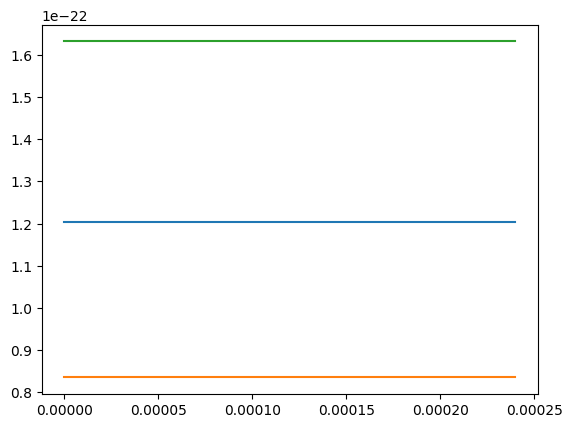

In [374]:
def MomentumOfParticles(timestep, initial_config, mass, iterations):
    system=np.copy(initial_config)
    shape=np.shape(initial_config)
    a1, a2, a3=np.random.randint(shape[2]), np.random.randint(shape[2]), np.random.randint(shape[2])
    a1_momenta_values=[]
    a2_momenta_values=[]
    a3_momenta_values=[]
    time_values=[]

    for t in range(iterations):
        time_values.append(timestep*t)
        Forces=LJForce(system, 1e-23, 1e-9)
        for particle in range(shape[2]):
            for dimension in range(shape[1]):
                system[0][dimension][particle]+=system[1][dimension][particle]*timestep/mass
                system[1][dimension][particle]+=Forces[particle][dimension]*timestep

        a1_momenta_values.append(math.sqrt(np.sum(system[1][dimension][a1])**2))
        a2_momenta_values.append(math.sqrt(np.sum(system[1][dimension][a2])**2))
        a3_momenta_values.append(math.sqrt(np.sum(system[1][dimension][a3])**2))
    
    plt.plot(time_values, a1_momenta_values)
    plt.plot(time_values, a2_momenta_values)
    plt.plot(time_values, a3_momenta_values)
    plt.show()

MomentumOfParticles(1e-5, config, 1e-26, 25)
            

## Potential Energy vs Time
***

(2, 3, 30)
1.5198347848110516
-1.1393859271454357e-80
2.0264631818720042
-1.6200524088335494e-80
0.3020478212286112
-1.4677534289776942e-78
1.0360302536274633
-1.5037236145525947e-78
2.0909240613434705
-1.508099291092205e-78
0.7303221280378921
-1.61078656219954e-78
2.6839762179344975
-1.612855388369836e-78
1.6068153789953097
-1.6224972756957743e-78
2.2823562946302776
-1.6258616914997495e-78
2.468984841177577
-1.6285193839384965e-78
0.4504748638601138
-2.0660901540033224e-78
1.3038152363389928
-2.0841374372985186e-78
2.3228619534105674
-2.0873289001187862e-78
5.111631767297984
-2.0876283894181724e-78
2.38661347292717
-2.0905708708258463e-78
1.5756324128433263
-2.1007966232216793e-78
1.228795621406159
-2.1223552466118687e-78
3.8162234327984024
-2.1230749583893163e-78
1.233851521917941
-2.1443696467135433e-78
2.0096915736502656
-2.1492976587123868e-78
2.220887166771438
-2.152949236087958e-78
2.4124641560047655
-2.1557981372552415e-78
4.789935952333405
-2.1561621116832545e-78
3.28112059402

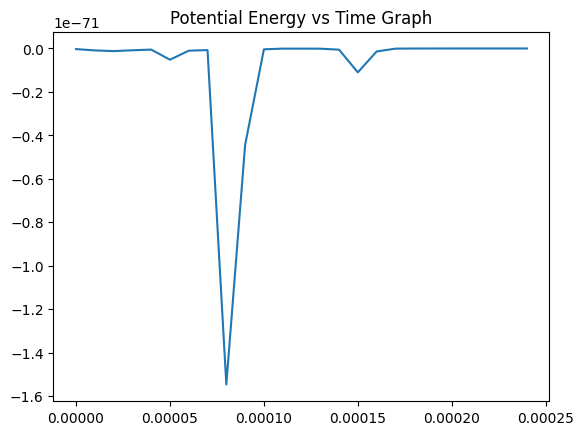

In [337]:
def PotentialTime(timestep, initial_config, mass, iterations):
    system=np.copy(initial_config)
    shape=np.shape(initial_config)
    print(shape)
    energy_values=[]
    time_values=[]

    for t in range(iterations):
        time_values.append(timestep*t)
        Forces=LJForce(system, 1e-23, 1e-9)
        Energy=PotentialEnergy(system, 1e-9, 1e-26)
        # print(Energy)
        
        for particle in range(shape[2]):
            for dimension in range(shape[1]):
                system[0][dimension][particle]+=system[1][dimension][particle]*timestep/mass
                system[1][dimension][particle]+=Forces[particle][dimension]*timestep

        energy_values.append(Energy)

    plt.title("Potential Energy vs Time Graph")
    plt.plot(time_values, energy_values)
    plt.show()

PotentialTime(1e-5, config, 1e-26, 25)
            

## Kinetic Energy vs Time
***

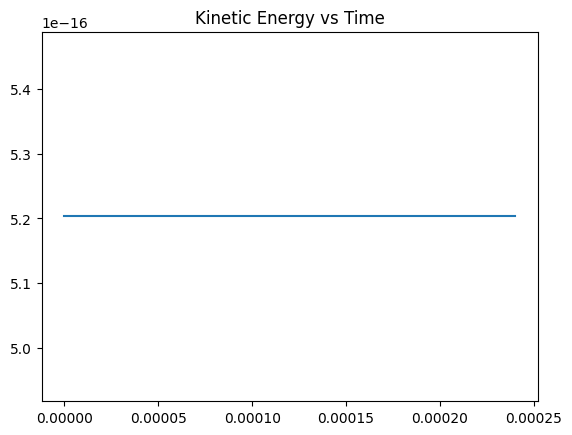

In [340]:
def KETime(timestep, initial_config, mass, iterations):
    system=np.copy(initial_config)
    shape=np.shape(initial_config)
    # print(shape)
    KE_values=[]
    time_values=[]

    for t in range(iterations):
        time_values.append(timestep*t)

        Forces=LJForce(system, 1e-23, 1e-9)
        for particle in range(shape[2]):
            for dimension in range(shape[1]):
                system[0][dimension][particle]+=system[1][dimension][particle]*timestep/mass
                system[1][dimension][particle]+=Forces[particle][dimension]*timestep
        KE_values.append((np.sum(system[1][dimension][:])**2)/(2*mass))

    plt.title("Kinetic Energy vs Time")
    plt.plot(time_values, KE_values)
    plt.show()

KETime(1e-5, config, 1e-26, 25)
            

## Total Energy vs Time
***

(2, 3, 30)
1.5198347848110516
-1.1393859271454357e-80
2.0264631818720042
-1.6200524088335494e-80
0.3020478212286112
-1.4677534289776942e-78
1.0360302536274633
-1.5037236145525947e-78
2.0909240613434705
-1.508099291092205e-78
0.7303221280378921
-1.61078656219954e-78
2.6839762179344975
-1.612855388369836e-78
1.6068153789953097
-1.6224972756957743e-78
2.2823562946302776
-1.6258616914997495e-78
2.468984841177577
-1.6285193839384965e-78
0.4504748638601138
-2.0660901540033224e-78
1.3038152363389928
-2.0841374372985186e-78
2.3228619534105674
-2.0873289001187862e-78
5.111631767297984
-2.0876283894181724e-78
2.38661347292717
-2.0905708708258463e-78
1.5756324128433263
-2.1007966232216793e-78
1.228795621406159
-2.1223552466118687e-78
3.8162234327984024
-2.1230749583893163e-78
1.233851521917941
-2.1443696467135433e-78
2.0096915736502656
-2.1492976587123868e-78
2.220887166771438
-2.152949236087958e-78
2.4124641560047655
-2.1557981372552415e-78
4.789935952333405
-2.1561621116832545e-78
3.28112059402

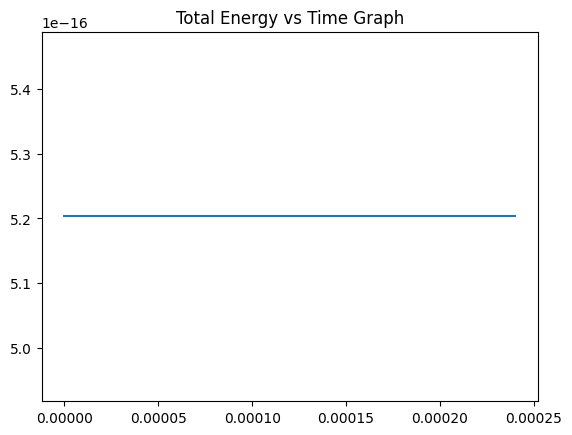

In [342]:
def TETime(timestep, initial_config, mass, iterations):
    system=np.copy(initial_config)
    shape=np.shape(initial_config)
    print(shape)
    energy_values=[]
    time_values=[]

    for t in range(iterations):
        time_values.append(timestep*t)
        Forces=LJForce(system, 1e-23, 1e-9)
        Energy=PotentialEnergy(system, 1e-9, 1e-26)
        # print(Energy)
        
        for particle in range(shape[2]):
            for dimension in range(shape[1]):
                system[0][dimension][particle]+=system[1][dimension][particle]*timestep/mass
                system[1][dimension][particle]+=Forces[particle][dimension]*timestep

        Energy+=(np.sum(system[1][dimension][:])**2)/(2*mass)
        energy_values.append(Energy)

    plt.title("Total Energy vs Time Graph")
    plt.plot(time_values, energy_values)
    plt.show()

TETime(1e-5, config, 1e-26, 25)
           